In [1]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

def show_image(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()

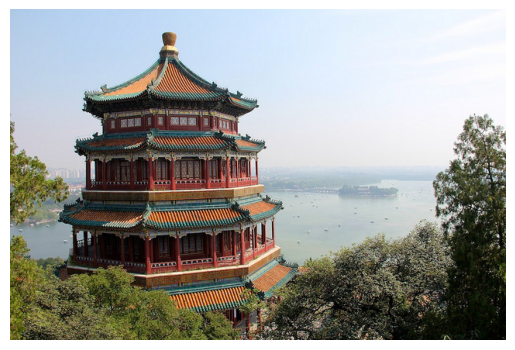

In [3]:
images = load_sample_images()["images"]
show_image(images[0])

In [4]:
images[0].shape

(427, 640, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


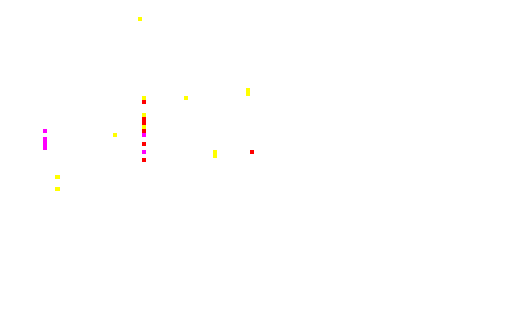

In [5]:
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
show_image(images[0])

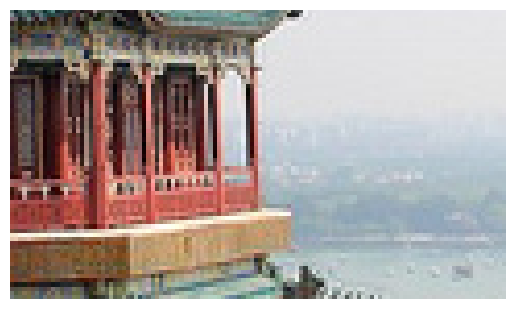

In [6]:
images = tf.keras.layers.Rescaling(scale=1/255)(images)
show_image(images[0])

In [7]:
images[0].shape

TensorShape([70, 120, 3])

In [8]:
images.shape

TensorShape([2, 70, 120, 3])

This is 4D tensor: here '2' means there are two images in the array, each are 70x120(HxW) in size, and finally '3' means channel;there are three colors: RGB.
### 2D Convolutional Layers or Conv2D

In [9]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [10]:
fmaps.shape

TensorShape([2, 64, 114, 32])

The output shape is almost similier with the input shape, with main difference. First, there are 32 channels insteads of 3. This is because we set filters=32, so we get 32 output feature maps: instead of the intensity red, green, and blue. We now have the intensity of each feature at 32 location. Second, height and width both shrunk by 6 pixel because Conv2D layer does not use zero padding by default, means we lose some information. As we set kernel_size=7, so we lose 6 pixels horizontally and 6 pixels vertically.

If we set padding="same", then the inputs are padded with enough zeros on all sides to output will be the same size of input.

In [11]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same")
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 70, 120, 32])

If the stride size is greater than 1, then output size will not the same as input even if we set padding="same".

In [12]:
kerners, biases = conv_layer.get_weights()
print(kerners.shape)
print(biases.shape)

(7, 7, 3, 32)
(32,)


The kernels array is 4D and its shape is [kernel_height, kernel_width, input_channel, output_channel]. For the biases 1D array its shape is [output_channels].

### Implementing Pooling Layers with Keras
The following code creates a MaxPooling2D layer, alias MaxPool2D, using a 2x2 kernel. By default, strides size=pool_size, and  padding="valid".

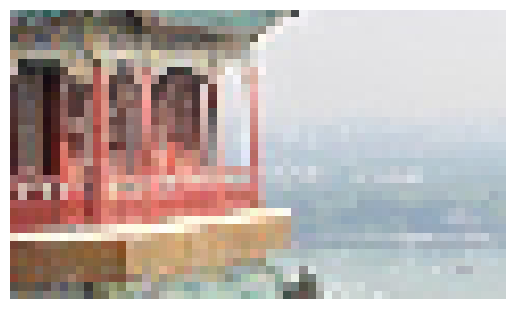

In [13]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)
max_outputs = max_pool(images)
show_image(max_outputs[0])

Keras does not include a depthwise max pooling layer, but it's not too difficult to implement a custom layer for that.

In [14]:
class DepthPool(tf.keras.layers.Layer):
    def __init__(self, pool_size=2, **kwargs):
        super().__init__(**kwargs)
        self.pool_size = pool_size
    
    def call(self, inputs):
        shape = tf.shape(inputs)  # shape[-1] is the number of channels
        groups = shape[-1] // self.pool_size  # number of channel groups
        new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
        return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

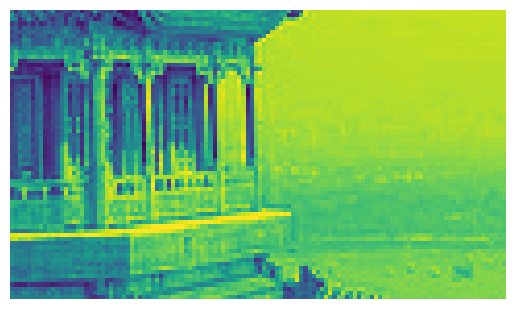

In [15]:
depth_output = DepthPool(pool_size=3)(images)
show_image(depth_output[0])

One last type of pooling layer that you will in modern architecture is the global average pooling layer.

In [17]:
global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.64338624, 0.5971759 , 0.5824972 ],
       [0.76306933, 0.26011038, 0.10849128]], dtype=float32)>